In [96]:
%matplotlib inline
import math
import numpy as np
from matplotlib.patches import Ellipse, Circle
from matplotlib import pyplot as plt
import cv2
print(cv2.__version__)

3.1.0


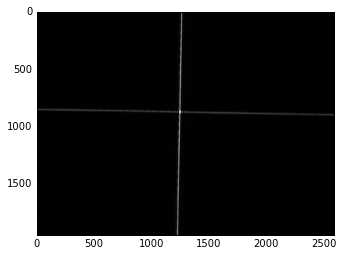

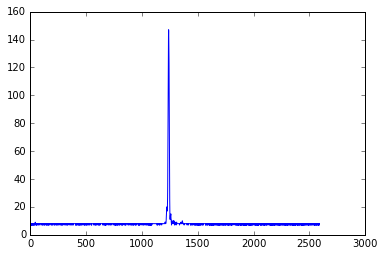

In [97]:
srcImg = cv2.imread("QuigoIII.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(srcImg, cmap = "gray", interpolation = "bicubic")
plt.show()
plt.plot(srcImg[972,:])

In [98]:
row = srcImg.shape[0]
col = srcImg.shape[1]

255


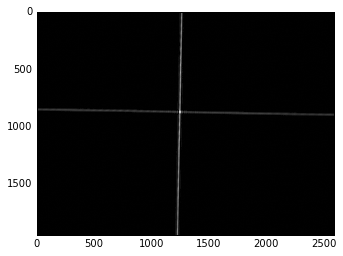

6340053

In [99]:
thredValue = 13
thredArray = np.zeros_like(srcImg)
for i in range(row):
    for j in range(col):
        if srcImg.item(i,j) > thredValue: 
            thredArray[i][j] = srcImg.item(i,j) 
            #thredArray[i][j] = 1
            # to test how the different between gray and binary format
            
print(np.max(thredArray))  
plt.imshow(thredArray, cmap = "gray", interpolation = "bicubic")
plt.show()
thredArray.sum()

In [100]:
factor = 1

1944
6340053.0
3261.3441358
7810.14816435
11071.4923002
[ 1807.  1835.  1810. ...,  1881.  1932.  1968.]


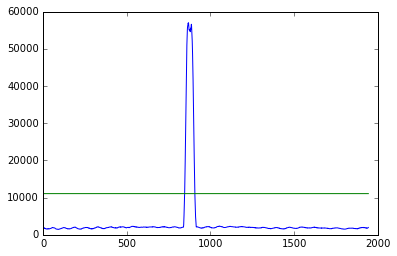

In [101]:
rowsum = np.zeros(row)

for i in range(row):
    for j in range(col):
        rowsum[i]+=thredArray.item(i,j)

segmentValue = np.mean(rowsum)+np.std(rowsum)*factor     
segmentLine  = np.zeros_like(rowsum) + segmentValue

print(row)
print(rowsum.sum())
print(np.mean(rowsum))
print(np.std(rowsum))
print(segmentValue)
print(rowsum)
plt.plot(rowsum)
plt.plot(segmentLine)

2592
6340053.0
2446.00810185
10515.4413924
12961.4494942
[ 835.  865.  947. ...,  912.  921.  965.]


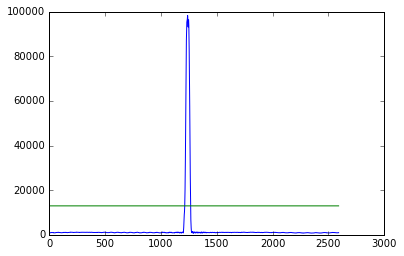

In [102]:
colsum = np.zeros(col)

for j in range(col):
    for i in range(row):
        colsum[j]+=thredArray.item(i,j)        

segmentValue = np.mean(colsum)+np.std(colsum)*factor     
segmentLine = np.zeros_like(colsum) + segmentValue

print(col)
print(colsum.sum())
print(np.mean(colsum))
print(np.std(colsum))
print(segmentValue)        
print  (colsum)
plt.plot(colsum)
plt.plot(segmentLine)

In [103]:
Trowsum = np.arange(len(rowsum))
Trindex = Trowsum[rowsum > (np.mean(rowsum)+np.std(rowsum)*factor) ] 
print (Trindex)

[846 847 848 849 850 851 852 853 854 855 856 857 858 859 860 861 862 863
 864 865 866 867 868 869 870 871 872 873 874 875 876 877 878 879 880 881
 882 883 884 885 886 887 888 889 890 891 892 893 894 895 896 897 898 899
 900 901 902 903 904 905 906]


In [104]:
Tcolsum = np.arange(len(colsum))
Tcindex = Tcolsum[colsum > (np.mean(colsum)+np.std(colsum)*factor)] 
print (Tcindex)

[1213 1214 1215 1216 1217 1218 1219 1220 1221 1222 1223 1224 1225 1226 1227
 1228 1229 1230 1231 1232 1233 1234 1235 1236 1237 1238 1239 1240 1241 1242
 1243 1244 1245 1246 1247 1248 1249 1250 1251 1252 1253 1254 1255 1256 1257
 1258 1259 1260 1261 1262 1263 1264 1265]


(0, 846) (2592, 906)
(1213, 0) (1265, 1944)


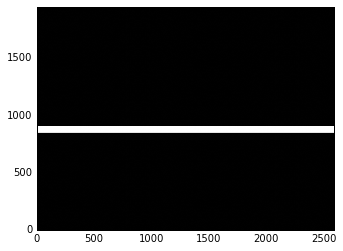

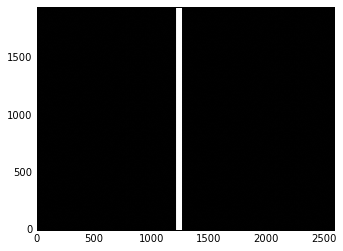

In [105]:
rowROI = np.zeros_like(thredArray)
colROI = np.zeros_like(thredArray)

if Trindex.size != 0:
    rowROI[Trindex[0]:Trindex[-1],:] = 1
    print((0,Trindex[0]),(col,Trindex[-1]))
    
if Tcindex.size != 0:
    colROI[:,Tcindex[0]:Tcindex[-1]] = 1
    print((Tcindex[0],0),(Tcindex[-1],row))

plt.imshow(rowROI,cmap="gray",interpolation="bicubic")
plt.ylim(0,row)
plt.xlim(0,col)
plt.show()
plt.imshow(colROI,cmap="gray",interpolation="bicubic")
plt.ylim(0,row)
plt.xlim(0,col)
plt.show()

(1944, 2592)


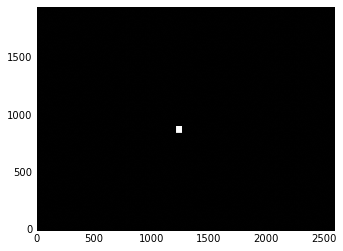

In [106]:
intersection = np.zeros_like(thredArray)
intersection = np.multiply(rowROI,colROI)
#cv2.bitwise_and(rowROI,colROI,intersection)
print (intersection.shape)
plt.imshow(intersection,cmap="gray",interpolation="bicubic")
plt.ylim(0,row)
plt.xlim(0,col)
plt.show()

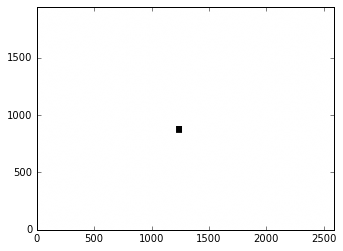

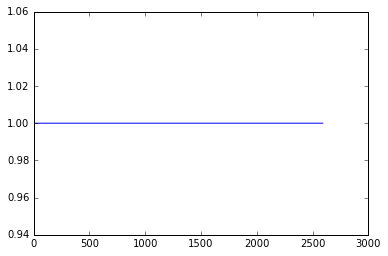

In [107]:
intersection = intersection[:,:]-1
intersection = np.abs(intersection)
intersection = (intersection)/255

#cv2.bitwise_not(intersection,intersection)
plt.imshow(intersection, cmap="gray", interpolation="bicubic")
plt.ylim(0,row)
plt.xlim(0,col)
plt.show()
plt.plot(intersection[972,:])

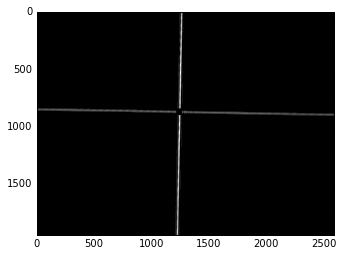

6177160.0


In [108]:
thredArray  = np.multiply(intersection,thredArray)
plt.imshow(thredArray, cmap="gray", interpolation="bicubic")
plt.show()
print(thredArray.sum())
# this is to add the random noise into the image data, to check how much changing for measurement
#plt.plot(thredArray[870,:])
#plt.show()
#for i in range(Trindex[-1]-Trindex[0]):
#    for j in range(col-1):
#        value = thredArray[i+Trindex[0]][j] + np.random.randint(-5,5)
#        if(value>=0):
#            thredArray[i+Trindex[0]][j] = value            
#plt.plot(thredArray[870,:])
#plt.show()

In [113]:
def CalMoments(ImageData, x0, x1, y0, y1, i,j ):    
    subArray = ImageData[x0:x1, y0:y1]
    subArray = np.asmatrix(subArray)
    
    #to be careful about the data format, in case of overflow
    XCoords  = np.arange(y0, y1, dtype = np.float64)
    XCoords  = np.asmatrix(XCoords)
    XCoords  = np.transpose(XCoords)
    YCoords  = np.arange(x0, x1, dtype = np.float64)
    YCoords  = np.asmatrix(YCoords)
    YCoords  = np.transpose(YCoords)
        
    XCoords  = np.power(XCoords,i)
    YCoords  = np.power(YCoords,j)
    
    #to be careful about the data format, in case of overflow
    retArrayX = np.zeros(YCoords.shape, np.float64)
    retArrayY = np.zeros(YCoords.shape, np.float64)
    
    #for matrix calculation, cross multiply is by *, dot multiply is by numpy.multiply
    #and need to sum together for the final output
    retArrayX = subArray * XCoords
    retArrayY = np.multiply(retArrayX, YCoords)
    retResult = retArrayY.sum()

    return retResult

In [114]:
mu = np.zeros([3,3])
for i in range(3):
    for j in range(3):
        mu[i,j] = CalMoments(thredArray, Trindex[0], Trindex[-1], 0, col, i, j ) 
print(mu)        

[[  2.51720200e+06   2.20459553e+09   1.93135561e+12]
 [  3.18229715e+09   2.81155157e+12   2.48450522e+15]
 [  5.37691667e+12   4.77143776e+15   4.23475885e+18]]


In [115]:
def DrawLineWidth(width, centroid, lineAxis):
    #offset = 100
    Extension = 800
    Centroid   = np.matrix([centroid[0],centroid[1]])
    LongAxis   = np.matrix([lineAxis[0],lineAxis[1]])
    ShortAxis  = np.matrix([lineAxis[1],-1*lineAxis[0]])
    ShortAxis  =  width * ShortAxis
    lineCenter = ShortAxis + Centroid
    lineLength = LongAxis*Extension

    lineStart  = lineCenter - lineLength
    lineEnd    = lineCenter + lineLength

    return(lineStart, lineEnd)

1264.22 875.81
19.38 -178.96
[[ 0.99983682 -0.01806453]
 [ 0.01806453  0.99983682]]
[  5.37992107e+05   4.07850489e+01]
(-0.9998368229816279, -0.018064534591429097)


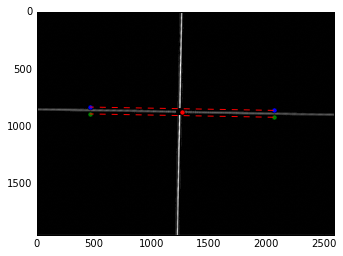

In [116]:
Cx = mu[1,0]/mu[0,0]
Cy = mu[0,1]/mu[0,0]
covMat = np.zeros((2,2))
covMat[0][0] = (mu[2,0]-mu[1,0]*mu[1,0]/mu[0,0])/mu[0,0]
covMat[0][1] = (mu[1,1]-mu[1,0]*mu[0,1]/mu[0,0])/mu[0,0]
covMat[1][0] = covMat[0][1]
covMat[1][1] = (mu[0,2]-mu[0,1]*mu[0,1]/mu[0,0])/mu[0,0]

eigenValue, eigenVector = np.linalg.eig(covMat)
min_val = eigenValue.min()
max_loc = eigenValue.argmax()
min_loc = eigenValue.argmin()

linewidth = (min_val*9.21034)**0.5
longAxis  = eigenVector[max_loc,:]
longAxis  = (-1*longAxis[0],longAxis[1]) 
lineangle = math.atan2(longAxis[1],longAxis[0])
lineangle = lineangle*180/math.pi

centroid = (Cx,Cy)

lineStart, lineEnd =DrawLineWidth(30, centroid, longAxis)

print('%.2f'%Cx, '%.2f'%Cy)
print('%.2f'%linewidth, '%.2f'%lineangle)
print(eigenVector)
print(eigenValue)
print(longAxis)

plt.imshow(thredArray, cmap="gray", interpolation="bicubic")

plt.plot(Cx,Cy,'o', color = 'r', markersize=5 )
plt.plot(lineStart[0,0], lineStart[0,1],'o', color = 'g', markersize=5 )
plt.plot(lineEnd[0,0], lineEnd[0,1],'o', color = 'g', markersize=5 )
plt.plot((lineStart[0,0], lineEnd[0,0]), (lineStart[0,1], lineEnd[0,1]),linestyle = '--', color = 'r')

lineStart, lineEnd =DrawLineWidth(-30, centroid, longAxis)

plt.plot(lineStart[0,0], lineStart[0,1],'o', color = 'b', markersize=5 )
plt.plot(lineEnd[0,0], lineEnd[0,1],'o', color = 'b', markersize=5 )
plt.plot((lineStart[0,0], lineEnd[0,0]), (lineStart[0,1], lineEnd[0,1]),linestyle = '--', color = 'r')

plt.ylim(1944,0)
plt.xlim(0,2592)
plt.show()

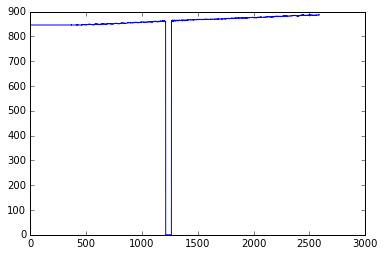

[ 846.  846.  846. ...,  887.  887.  887.]


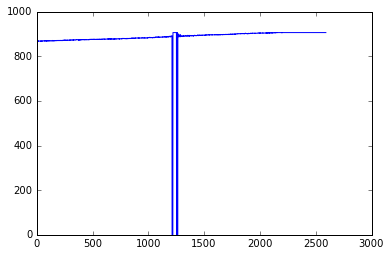

[ 868.  867.  868. ...,  906.  906.  906.]


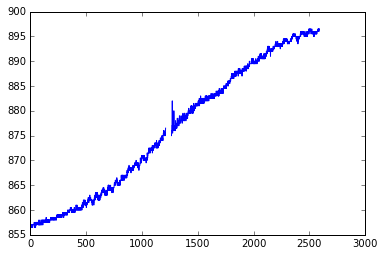

[ 857.   856.5  857.  ...,  896.5  896.5  896.5]


In [118]:
## here to restrain analysis for the location
subArray = thredArray[Trindex[0]:Trindex[-1]+1, :]
rows = Trindex[-1]-Trindex[0]
uindecis = np.zeros((col))
lindecis = np.zeros((col))
location = np.zeros((col))
for i in range(col):
    for j in range(rows):
        if(subArray[j][i] > thredValue):
            uindecis[i] = j+Trindex[0]
            break

for i in range(col):
    for j in range(rows):
        if(subArray[rows-j][i] > thredValue):
            lindecis[i] = Trindex[-1]-j
            break   
            
for i in range(col):
    if((uindecis[i] * lindecis[i])>0):
        location[i]=(uindecis[i]+lindecis[i])/2
    else:
        location[i]=np.nan
    
plt.plot(uindecis)
plt.show() 
print(uindecis)
plt.plot(lindecis)
plt.show() 
print(lindecis)
plt.plot(location[:col])
plt.show()  
print(location[:col])

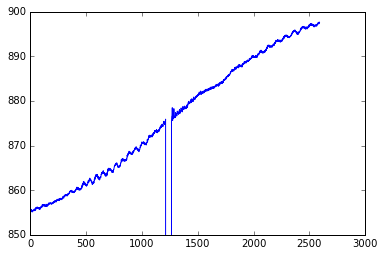

[ 855.51807229  855.38888889  855.53053892 ...,  897.58403361  897.61080332
  897.53825503]


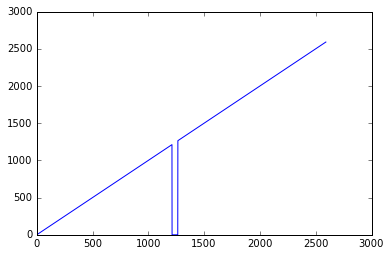

In [119]:
subArray = thredArray[Trindex[0]:Tcindex[-1], :]
rows = Trindex[-1]-Trindex[0]
m00 = np.zeros((col))
m01 = np.zeros((col))
m10 = np.zeros((col))
posX= np.zeros((col))
posY= np.zeros((col))
for i in range(col):
    for j in range(rows):
        if(subArray[j][i] > thredValue):
            m00[i] = m00[i] + subArray[j][i]
            m01[i] = m01[i] + i*subArray[j][i]
            m10[i] = m10[i] + (j+Trindex[0])*subArray[j][i]

for i in range(col):
    if(m00[i]):
        posX[i] = m10[i]/m00[i]
        posY[i] = m01[i]/m00[i]
plt.plot(posX)
plt.ylim(850,900)
plt.show()
print(posX)
plt.plot(posY)
plt.show()
#print(posX)
#print(posY)

In [120]:
def lineInterpolation(Interval, centroid, lineAxis):
    Interval   = int(centroid[0]) - Interval
    Centroid   = np.matrix([centroid[0],centroid[1]])
    LongAxis   = np.matrix([lineAxis[0],lineAxis[1]])
    InterPoint =  Interval * LongAxis
    InterPoint = InterPoint + Centroid
    return(InterPoint)

[[  4.26270275e-01   8.52978353e+02]
 [  1.42610710e+00   8.52996418e+02]
 [  2.42594392e+00   8.53014482e+02]
 ..., 
 [  2.58900380e+03   8.99747433e+02]
 [  2.59000364e+03   8.99765498e+02]
 [  2.59100348e+03   8.99783562e+02]]


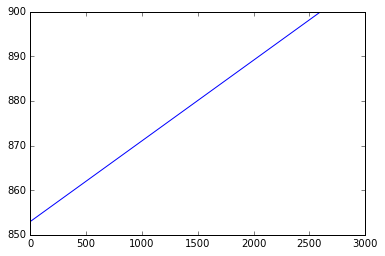

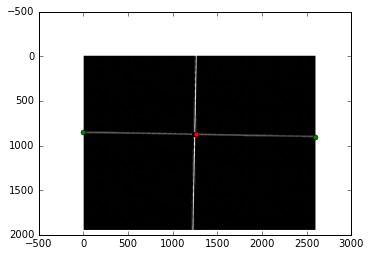

In [121]:
longAxis  = eigenVector[max_loc,:]
longAxis  = (-1*longAxis[0],longAxis[1]) 
centroid = (Cx,Cy)
points = np.zeros((col,2))
for i in range(col):
    points[i] = lineInterpolation(i, centroid, longAxis)
    
print(points)    
plt.plot(points[:,1])
plt.show()

plt.imshow(thredArray, cmap="gray", interpolation="bicubic")
plt.plot(Cx,Cy,'o', color = 'r', markersize=5 )

plt.plot((0,col-1), (points[0][1],points[col-1][1]),'o', color = 'g', markersize=5 )



2540
876.402037778
0.0235950895887


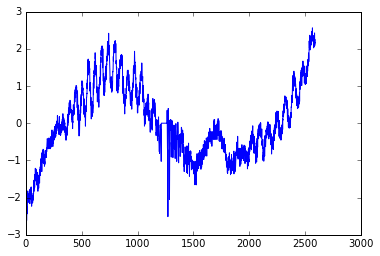

In [122]:
differ = np.zeros((col))
differMean = 0
meanPos = 0  
count = 0
for i in range(0,col-0):
    if(posX[i]):
        differ[i] = points[i][1]-posX[i]
        meanPos = meanPos + points[i][1]
        count   = count + 1
        differMean = differMean + differ[i]
        
meanPos = meanPos/count
print(count)
print(meanPos)    
plt.plot(differ)    
differMean = differMean /count
print(differMean)

In [123]:
subArray = thredArray[Trindex[0]:Tcindex[-1], :]
rows = Trindex[-1]-Trindex[0]
m00 = 0
m01 = 0
m10 = 0
posX= 0
posY= 0

for i in range(col):
    if(np.abs(differ[i]) < 1):
        for j in range(rows):      
            if(subArray[j][i] > thredValue):            
                m00 = m00 + subArray[j][i]
                m01= m01 + i*subArray[j][i]
                m10= m10 + (j+Trindex[0])*subArray[j][i]
                
posX = m10/m00
posY= m01/m00        
print(posY)  
print(posX)    

1316.6014164
876.893168009
